# Project: Investigate a Dataset (Ultimate EU soccer database)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>   
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

    > This data set contains more than 25,000 soccer matches from 2008 until 2016 (totaly 8 seasons) and the player is more than 10,000 persons throught 11 countires. Moreover, the data also provide detial like cross amount, goal type, corner amount, attributes of player and team and etc. which we can do the analysis on thoese detail and visualize during EDA phase but before that we need to gather the data from SQLite and clean up the data through this analysis, I am not going to use all of table on dataset but require some SQL join tables. Finally, the finding that I want to explore are 
    
    - Top 10 best player on the European professional football league ?
    - Does the height of professional football players affected the thier capability of playing during thier career ?

In [1]:
# import necessary libraies

import pandas as pd 
import sqlite3
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb

In [134]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.


<a id='wrangling'></a>
## Data Wrangling

> In this phase, we are going to gathering the ultimate soccer dataset from sqlitedatabase and then accessing the data to find tidiness and quality issues by pandas. Finaaly, we are going to clean the data regarding of qulity,tidyness iusses which is found during accessing phase.  

In [2]:
# Gather and load the data

# Firstly,we need to create a connection object that represents the ultimate soccer database

connection = sqlite3.connect('database.sqlite')
connection

In [3]:
# Second, create a cursor to 

cursor = connection.cursor()
cursor

In [4]:
# Test executing the first 10 players from player table

cursor.execute('SELECT * FROM player LIMIT 10')

In [5]:
# Try fetch the data from player table
cursor.fetchall()

[(1, 505942, 'Aaron Appindangoye', 218353, '1992-02-29 00:00:00', 182.88, 187),
 (2, 155782, 'Aaron Cresswell', 189615, '1989-12-15 00:00:00', 170.18, 146),
 (3, 162549, 'Aaron Doran', 186170, '1991-05-13 00:00:00', 170.18, 163),
 (4, 30572, 'Aaron Galindo', 140161, '1982-05-08 00:00:00', 182.88, 198),
 (5, 23780, 'Aaron Hughes', 17725, '1979-11-08 00:00:00', 182.88, 154),
 (6, 27316, 'Aaron Hunt', 158138, '1986-09-04 00:00:00', 182.88, 161),
 (7, 564793, 'Aaron Kuhl', 221280, '1996-01-30 00:00:00', 172.72, 146),
 (8, 30895, 'Aaron Lennon', 152747, '1987-04-16 00:00:00', 165.1, 139),
 (9, 528212, 'Aaron Lennox', 206592, '1993-02-19 00:00:00', 190.5, 181),
 (10, 101042, 'Aaron Meijers', 188621, '1987-10-28 00:00:00', 175.26, 170)]

In [6]:
# create function to automate fentched and make the next call easily 

def sql(query,connection = connection):
    cursor.execute(query)
    return cursor.fetchall()

In [7]:
# Regarding of the question and finding, we are going make a query and outer join table player and player_attributes and selecting only the important columns
## The data is quite a lot of duplication on each player skill update.So, I am going to pre-clean the data by aggregate function SQL then going to clean again by pandas
data_new = sql('SELECT p.id,p.player_api_id,p.player_name,p.birthday,AVG(p.height),AVG(pa.overall_rating),AVG(pa.potential),pa.preferred_foot,pa.attacking_work_rate,pa.defensive_work_rate,AVG(pa.crossing),AVG(pa.finishing),AVG(pa.short_passing),AVG(pa.stamina),AVG(pa.dribbling),AVG(pa.free_kick_accuracy) FROM player AS p INNER JOIN player_attributes AS pa ON p.player_api_id = pa.player_api_id GROUP BY p.id,p.player_name,p.birthday,pa.preferred_foot,pa.attacking_work_rate,pa.defensive_work_rate')
df = pd.DataFrame(data_new, columns = ['id','player_api_id','player_name','birthday','height','overall_rating','potential','preferred_foot','attacking_work_rate','defensive_work_rate','crossing','finishing','short_passing','stamina','dribbling','free_kick_accuracy'])
df

,id,player_api_id,player_name,birthday,height,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,short_passing,stamina,dribbling,free_kick_accuracy
0,1,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,63.600000,67.600000,right,medium,medium,48.600000,43.600000,60.600000,54.000000,50.600000,38.600000
1,2,155782,Aaron Cresswell,1989-12-15 00:00:00,170.18,73.428571,76.000000,left,high,medium,79.285714,51.714286,70.285714,79.000000,71.571429,69.000000
2,2,155782,Aaron Cresswell,1989-12-15 00:00:00,170.18,66.250000,75.250000,left,medium,medium,72.375000,48.916667,61.875000,72.500000,60.958333,63.125000
3,2,155782,Aaron Cresswell,1989-12-15 00:00:00,170.18,53.000000,60.000000,right,medium,medium,22.000000,48.000000,39.000000,56.000000,26.000000,26.000000
4,3,162549,Aaron Doran,1991-05-13 00:00:00,170.18,67.000000,74.192308,right,medium,medium,68.115385,57.923077,65.115385,70.923077,69.038462,55.615385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18191,11072,111182,Zsolt Laczko,1986-12-18 00:00:00,182.88,63.000000,67.000000,left,high,medium,65.000000,44.000000,63.000000,77.000000,57.000000,64.000000
18192,11072,111182,Zsolt Laczko,1986-12-18 00:00:00,182.88,66.071429,72.285714,left,medium,medium,67.571429,47.142857,63.142857,76.785714,61.785714,61.428571
18193,11073,36491,Zsolt Low,1979-04-29 00:00:00,180.34,67.571429,72.857143,left,None,_0,63.142857,44.571429,66.857143,70.000000,66.857143,52.571429
18194,11074,35506,Zurab Khizanishvili,1981-10-06 00:00:00,185.42,70.750000,78.125000,right,None,_0,46.750000,43.000000,58.875000,70.500000,36.000000,41.375000


#### Data Cleaning 

> in this phase, after finishing gather the data, we are going to inspect this dataset that we have queried from sqlite3 by searching for data quality (content issues) and data untidyness (structural issues) as a result of this, we can call accesing the data. Then, after accessing the data, we will start cleaning the data regarded of issue we found by mostly pandas and numpy library to make the dataset clean and ready for exploring. 

In [8]:
# To see the basic infomation of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18196 entries, 0 to 18195
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   18196 non-null  int64  
 1   player_api_id        18196 non-null  int64  
 2   player_name          18196 non-null  object 
 3   birthday             18196 non-null  object 
 4   height               18196 non-null  float64
 5   overall_rating       17440 non-null  float64
 6   potential            17440 non-null  float64
 7   preferred_foot       17440 non-null  object 
 8   attacking_work_rate  16880 non-null  object 
 9   defensive_work_rate  17440 non-null  object 
 10  crossing             17440 non-null  float64
 11  finishing            17440 non-null  float64
 12  short_passing        17440 non-null  float64
 13  stamina              17440 non-null  float64
 14  dribbling            17440 non-null  float64
 15  free_kick_accuracy   17440 non-null 

In [9]:
# To see the describtive statistic of dataset

df.describe()

,id,player_api_id,height,overall_rating,potential,crossing,finishing,short_passing,stamina,dribbling,free_kick_accuracy
count,18196.000000,18196.000000,18196.000000,17440.000000,17440.000000,17440.000000,17440.000000,17440.000000,17440.000000,17440.000000,17440.000000
mean,5519.389371,146683.022972,181.564772,67.318543,72.476202,54.756615,49.895748,61.953707,66.694306,59.100208,49.040456
std,3193.515880,150814.898047,6.325060,6.551424,6.092445,15.653217,17.918971,12.735074,11.358594,16.119796,16.176382
min,1.000000,2625.000000,157.480000,41.000000,49.666667,6.000000,5.000000,10.571429,16.000000,3.000000,5.714286
25%,2755.000000,35495.750000,177.800000,63.000000,68.061581,45.800000,35.000000,57.000000,61.000000,52.000000,37.666667
50%,5514.500000,89740.000000,182.880000,67.200000,72.454545,58.000000,53.000000,64.000000,68.000000,62.875000,49.555556
75%,8277.250000,202343.000000,185.420000,71.750000,76.600000,66.000000,64.363636,70.114583,74.000000,70.181818,61.285714
max,11075.000000,750584.000000,208.280000,93.400000,95.500000,92.000000,94.000000,95.181818,94.000000,96.687500,93.600000


In [10]:
# To see the missing value in each columns

df.isnull().sum()

id                        0
player_api_id             0
player_name               0
birthday                  0
height                    0
overall_rating          756
potential               756
preferred_foot          756
attacking_work_rate    1316
defensive_work_rate     756
crossing                756
finishing               756
short_passing           756
stamina                 756
dribbling               756
free_kick_accuracy      756
dtype: int64

In [11]:
# To see the duplication on id columns 

df.id.duplicated().sum()

# There is no duplication on any columns

7136

In [12]:
# Inspect the unique data in columns attacking,defensive work rate 

df[['attacking_work_rate','defensive_work_rate']]

,attacking_work_rate,defensive_work_rate
0,medium,medium
1,high,medium
2,medium,medium
3,medium,medium
4,medium,medium
...,...,...
18191,high,medium
18192,medium,medium
18193,None,_0
18194,None,_0


### Quality: issues 
- 1.According to the dataset, I have noticed the None on this column which is supposed to be only high,low and medium.However, none is appeared to be stranged but no need to clean becuase the potential column can use to state the quality of player if we clean or get rid of this columns the data is going to be bais because you might drop the potential player 
- 2.Also for defensive_work_rate, there _0 appears on dataset but we can't clean it because it might get rid of top or low quality player and make dataset bias. However, we solve this problem by using potential column to predict and cal player quality instead

### Tidyness issues 

- 1.Split columns birthdate into Year/Month/Date/Time by str split method 
- 2.There are duplicated player's stat on Fifa update so we are going to average the potential since 2008-2016 by pandas group by method
- 3.There are column actually duplicated in table player and player attributions but we already utilise SQLite3 to join instead merging by pandas


In [13]:
df[['attacking_work_rate','defensive_work_rate']]

,attacking_work_rate,defensive_work_rate
0,medium,medium
1,high,medium
2,medium,medium
3,medium,medium
4,medium,medium
...,...,...
18191,high,medium
18192,medium,medium
18193,None,_0
18194,None,_0


In [14]:
# Before doing the data cleaning process,we are going to copy the dataset to prevent the change on orginal version

df_clean = df.copy()
df_clean.head(5)

,id,player_api_id,player_name,birthday,height,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,short_passing,stamina,dribbling,free_kick_accuracy
0,1,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,63.600000,67.600000,right,medium,medium,48.600000,43.600000,60.600000,54.000000,50.600000,38.600000
1,2,155782,Aaron Cresswell,1989-12-15 00:00:00,170.18,73.428571,76.000000,left,high,medium,79.285714,51.714286,70.285714,79.000000,71.571429,69.000000
2,2,155782,Aaron Cresswell,1989-12-15 00:00:00,170.18,66.250000,75.250000,left,medium,medium,72.375000,48.916667,61.875000,72.500000,60.958333,63.125000
3,2,155782,Aaron Cresswell,1989-12-15 00:00:00,170.18,53.000000,60.000000,right,medium,medium,22.000000,48.000000,39.000000,56.000000,26.000000,26.000000
4,3,162549,Aaron Doran,1991-05-13 00:00:00,170.18,67.000000,74.192308,right,medium,medium,68.115385,57.923077,65.115385,70.923077,69.038462,55.615385


### Quality issues

to explore the question the overall_rating need to be not null value becuase we can't judge those players who lack of rating data.So,we are going to get rid of those players

Define 

In [15]:
#1.According to the dataset, I have noticed the None on this column which is supposed to be only high,low and medium.However, none is appeared to be stranged but no need to clean becuase the potential column can use to state the quality of player if we clean or get rid of this columns the data is going to be bais because you might drop the potential player 

df_clean[df_clean.overall_rating.isnull()]

,id,player_api_id,player_name,birthday,height,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,short_passing,stamina,dribbling,free_kick_accuracy
46,31,31684,Abdeslam Ouaddou,1978-11-01 00:00:00,190.50,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
99,62,29904,Abel Gomez,1982-02-20 00:00:00,182.88,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
171,109,24159,Adam Johnson,1987-07-14 00:00:00,175.26,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
204,126,31916,Adam Rooney,1988-04-21 00:00:00,177.80,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
238,146,37249,Adil Chihi,1988-02-21 00:00:00,182.88,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18051,10983,25538,Youssouf Hadji,1980-02-25 00:00:00,182.88,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
18116,11025,32633,Zbigniew Malkowski,1978-01-19 00:00:00,187.96,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
18123,11029,33823,Zdenek Pospech,1978-12-14 00:00:00,175.26,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
18126,11030,25772,Zdravko Kuzmanovic,1987-09-22 00:00:00,185.42,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN


Code

In [16]:
# These player might not player as much as they could or they might hang the stuct or even in the prison.Thus, we gonna get rid of those players

df_clean.dropna(subset=['overall_rating'],inplace=True)

Test

In [17]:
# Test the code

df_clean

,id,player_api_id,player_name,birthday,height,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,short_passing,stamina,dribbling,free_kick_accuracy
0,1,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,63.600000,67.600000,right,medium,medium,48.600000,43.600000,60.600000,54.000000,50.600000,38.600000
1,2,155782,Aaron Cresswell,1989-12-15 00:00:00,170.18,73.428571,76.000000,left,high,medium,79.285714,51.714286,70.285714,79.000000,71.571429,69.000000
2,2,155782,Aaron Cresswell,1989-12-15 00:00:00,170.18,66.250000,75.250000,left,medium,medium,72.375000,48.916667,61.875000,72.500000,60.958333,63.125000
3,2,155782,Aaron Cresswell,1989-12-15 00:00:00,170.18,53.000000,60.000000,right,medium,medium,22.000000,48.000000,39.000000,56.000000,26.000000,26.000000
4,3,162549,Aaron Doran,1991-05-13 00:00:00,170.18,67.000000,74.192308,right,medium,medium,68.115385,57.923077,65.115385,70.923077,69.038462,55.615385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18191,11072,111182,Zsolt Laczko,1986-12-18 00:00:00,182.88,63.000000,67.000000,left,high,medium,65.000000,44.000000,63.000000,77.000000,57.000000,64.000000
18192,11072,111182,Zsolt Laczko,1986-12-18 00:00:00,182.88,66.071429,72.285714,left,medium,medium,67.571429,47.142857,63.142857,76.785714,61.785714,61.428571
18193,11073,36491,Zsolt Low,1979-04-29 00:00:00,180.34,67.571429,72.857143,left,None,_0,63.142857,44.571429,66.857143,70.000000,66.857143,52.571429
18194,11074,35506,Zurab Khizanishvili,1981-10-06 00:00:00,185.42,70.750000,78.125000,right,None,_0,46.750000,43.000000,58.875000,70.500000,36.000000,41.375000


Define

Code

In [18]:
df_clean[df_clean['defensive_work_rate'] == '_0']

,id,player_api_id,player_name,birthday,height,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,short_passing,stamina,dribbling,free_kick_accuracy
32,20,46447,Abasse Ba,1976-07-12 00:00:00,187.96,65.600000,70.600000,right,None,_0,41.000000,33.000000,55.800000,67.200000,30.000000,43.000000
34,22,245653,Abdelfettah Boukhriss,1986-10-22 00:00:00,185.42,64.000000,69.000000,left,None,_0,47.000000,29.000000,57.000000,65.000000,47.000000,45.000000
40,26,38423,Abdelmajid Oulmers,1978-09-12 00:00:00,172.72,68.800000,69.400000,right,None,_0,60.000000,50.000000,74.000000,71.400000,74.000000,51.800000
41,27,3264,Abdelmalek Cherrad,1981-01-14 00:00:00,185.42,61.600000,73.000000,right,None,_0,49.000000,64.000000,54.000000,58.000000,56.400000,44.000000
47,31,31684,Abdeslam Ouaddou,1978-11-01 00:00:00,190.50,76.600000,78.600000,right,None,_0,67.200000,34.000000,71.600000,86.600000,62.400000,34.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18069,10994,26471,Yuri Cornelisse,1975-05-08 00:00:00,182.88,64.000000,71.250000,left,None,_0,63.000000,62.000000,61.500000,61.500000,62.500000,56.000000
18129,11031,27631,Ze Antonio,1977-03-14 00:00:00,185.42,72.285714,79.428571,left,None,_0,48.428571,22.428571,57.857143,66.285714,43.428571,45.428571
18147,11040,45308,Ze Vitor,1982-02-11 00:00:00,175.26,61.600000,64.800000,right,None,_0,39.600000,60.600000,62.600000,70.600000,63.600000,67.600000
18193,11073,36491,Zsolt Low,1979-04-29 00:00:00,180.34,67.571429,72.857143,left,None,_0,63.142857,44.571429,66.857143,70.000000,66.857143,52.571429


### Tidyness issues

to clean tidyness issues we need to use lots of method like str split regex and etc.

Define

1.Split columns birthdate into Year/Month/Date/Time by str split method and Regex

Code

In [19]:
df_clean[['year','month','day']] = df.birthday.str.split("-",expand=True)
df_clean2 = df_clean.drop(columns =['birthday','month','day'])

Test

In [20]:
df_clean2

,id,player_api_id,player_name,height,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,short_passing,stamina,dribbling,free_kick_accuracy,year
0,1,505942,Aaron Appindangoye,182.88,63.600000,67.600000,right,medium,medium,48.600000,43.600000,60.600000,54.000000,50.600000,38.600000,1992
1,2,155782,Aaron Cresswell,170.18,73.428571,76.000000,left,high,medium,79.285714,51.714286,70.285714,79.000000,71.571429,69.000000,1989
2,2,155782,Aaron Cresswell,170.18,66.250000,75.250000,left,medium,medium,72.375000,48.916667,61.875000,72.500000,60.958333,63.125000,1989
3,2,155782,Aaron Cresswell,170.18,53.000000,60.000000,right,medium,medium,22.000000,48.000000,39.000000,56.000000,26.000000,26.000000,1989
4,3,162549,Aaron Doran,170.18,67.000000,74.192308,right,medium,medium,68.115385,57.923077,65.115385,70.923077,69.038462,55.615385,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18191,11072,111182,Zsolt Laczko,182.88,63.000000,67.000000,left,high,medium,65.000000,44.000000,63.000000,77.000000,57.000000,64.000000,1986
18192,11072,111182,Zsolt Laczko,182.88,66.071429,72.285714,left,medium,medium,67.571429,47.142857,63.142857,76.785714,61.785714,61.428571,1986
18193,11073,36491,Zsolt Low,180.34,67.571429,72.857143,left,None,_0,63.142857,44.571429,66.857143,70.000000,66.857143,52.571429,1979
18194,11074,35506,Zurab Khizanishvili,185.42,70.750000,78.125000,right,None,_0,46.750000,43.000000,58.875000,70.500000,36.000000,41.375000,1981


Define

2 There are duplicated player's stat on Fifa update so we are going to average the potential since 2008-2016 by pandas group by method

Code

In [88]:
# Averaging the stat of each player since 2008-2016 should imply the real perfomance during thier professional football cycle

df_avg_stat = df_clean2.groupby(["player_name","id","year"],as_index=False).mean()

Test

In [89]:
df_avg_stat.sort_values(by=['id'],inplace=True)
df_avg_stat

,player_name,id,year,player_api_id,height,overall_rating,potential,crossing,finishing,short_passing,stamina,dribbling,free_kick_accuracy
0,Aaron Appindangoye,1,1992,505942,182.88,63.600000,67.600000,48.600000,43.600000,60.600000,54.000000,50.600000,38.600000
1,Aaron Cresswell,2,1989,155782,170.18,64.226190,70.416667,57.886905,49.543651,57.053571,69.166667,52.843254,52.708333
2,Aaron Doran,3,1991,162549,170.18,67.000000,74.192308,68.115385,57.923077,65.115385,70.923077,69.038462,55.615385
3,Aaron Galindo,4,1982,30572,182.88,69.825893,72.491071,57.558036,29.843750,64.700893,58.888393,55.486607,40.843750
4,Aaron Hughes,5,1979,23780,182.88,73.240000,74.680000,45.080000,38.840000,64.760000,66.480000,50.600000,26.360000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11053,Zoumana Camara,11071,1979,26357,182.88,74.384615,75.461538,42.000000,27.000000,70.000000,60.000000,56.384615,35.692308
11054,Zsolt Laczko,11072,1986,111182,182.88,64.535714,69.642857,66.285714,45.571429,63.071429,76.892857,59.392857,62.714286
11055,Zsolt Low,11073,1979,36491,180.34,67.571429,72.857143,63.142857,44.571429,66.857143,70.000000,66.857143,52.571429
11056,Zurab Khizanishvili,11074,1981,35506,185.42,70.750000,78.125000,46.750000,43.000000,58.875000,70.500000,36.000000,41.375000


<a id='eda'></a>
## Exploratory Data Analysis


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'player_api_id'}>,
        <AxesSubplot:title={'center':'height'}>],
       [<AxesSubplot:title={'center':'overall_rating'}>,
        <AxesSubplot:title={'center':'potential'}>,
        <AxesSubplot:title={'center':'crossing'}>],
       [<AxesSubplot:title={'center':'finishing'}>,
        <AxesSubplot:title={'center':'short_passing'}>,
        <AxesSubplot:title={'center':'stamina'}>],
       [<AxesSubplot:title={'center':'dribbling'}>,
        <AxesSubplot:title={'center':'free_kick_accuracy'}>,
        <AxesSubplot:>]], dtype=object)

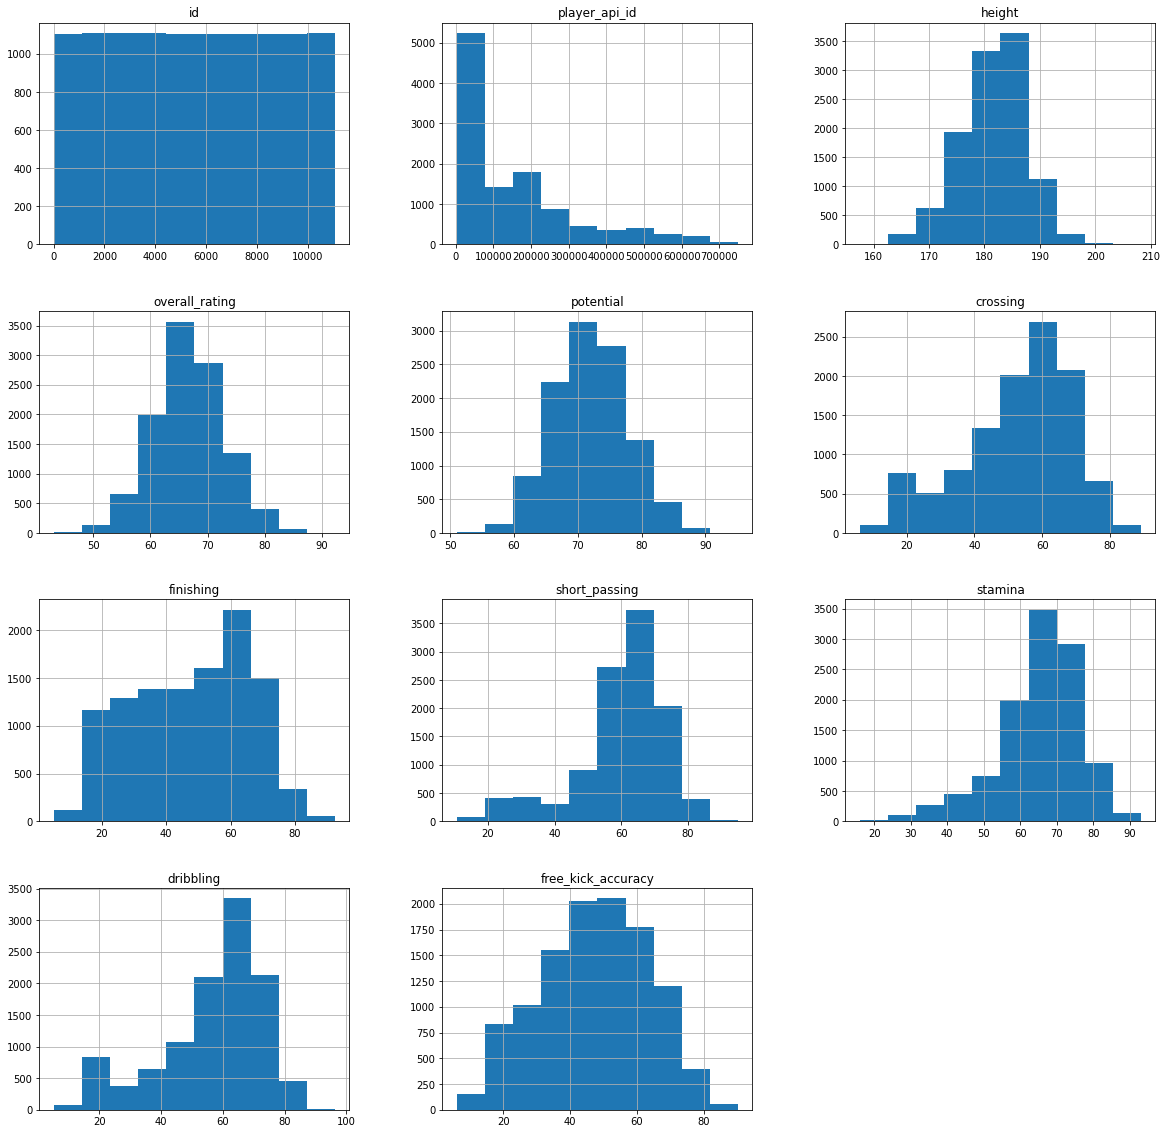

In [90]:
# Doing exploratory analysis is to plot several describtive graph to find the outliner and the 

df_avg_stat.hist(figsize=[20,20])

We shall see the several histogram plots on above which  (ignore id and player_api_id becuase we focus on player's skills)
- height,potential,over_rating,free_kick_accuracy is normal distribution
- crossing,dribbling,stamina,short_passing,finishing is left skewed distribution

<AxesSubplot:>

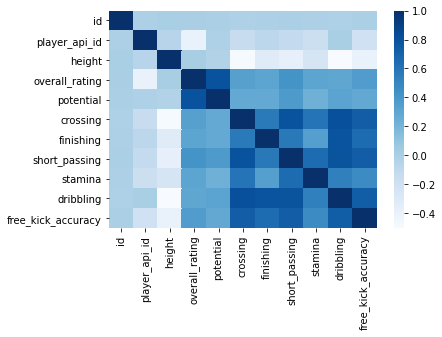

In [91]:
# Check correlation

plt.figure(figsize=(6,4))
sb.heatmap(df_avg_stat.corr(),cmap='Blues',annot=False) 

We shall see the correlation between pair of skill. For example, player who got high crossing score tends to have high short_passing score and it is reasonable becuase in reality players who are good at passing will also good at crossing. To clarify, a good correlation of a pair of skills where score between 0.6-1.0 which is dark blue color but a bad correlation of a pair of skills where score between 0-0.4 which is light blue.

<AxesSubplot:ylabel='free_kick_accuracy'>

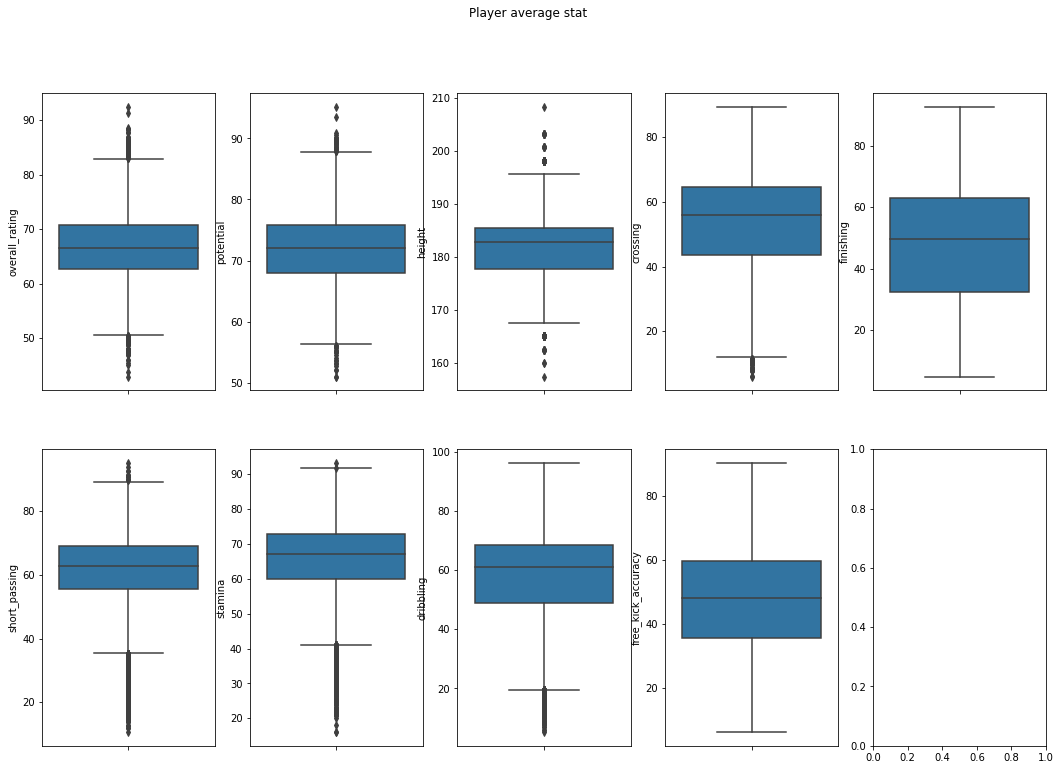

In [98]:
# To plot boxplot in the same cell, we are going to utilize subplot,axes as data visualization's lesson 

fig, axes = plt.subplots(2, 5, figsize=(18, 12))

fig.suptitle('Player average stat')

sb.boxplot(ax=axes[0, 0], data=df_avg_stat, y='overall_rating')
sb.boxplot(ax=axes[0, 1], data=df_avg_stat, y='potential')
sb.boxplot(ax=axes[0, 2], data=df_avg_stat, y='height')
sb.boxplot(ax=axes[0, 3], data=df_avg_stat, y='crossing')
sb.boxplot(ax=axes[0, 4], data=df_avg_stat, y='finishing')
sb.boxplot(ax=axes[1, 0], data=df_avg_stat, y='short_passing')
sb.boxplot(ax=axes[1, 1], data=df_avg_stat, y='stamina')
sb.boxplot(ax=axes[1, 2], data=df_avg_stat, y='dribbling')
sb.boxplot(ax=axes[1, 3], data=df_avg_stat, y='free_kick_accuracy')
    

We shall see the average score of each skill and the outliner.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

###  1.Top 10 the best player on the European professional football league ?

In [360]:
# copy dataframe to answer question1

df_q1 = df_avg_stat.copy()

In [361]:
# group people who are the best 10 guys during 2008-2016

df_q1.sort_values(by=['overall_rating'],inplace=True,ascending=False)
df_q1.head(10)

,player_name,id,year,player_api_id,height,overall_rating,potential,crossing,finishing,short_passing,stamina,dribbling,free_kick_accuracy
6167,Lionel Messi,6176,1987,30981,170.18,92.418750,95.150000,83.243750,92.562500,88.787500,77.362500,96.393750,85.143750
1994,Cristiano Ronaldo,1995,1985,30893,185.42,91.280000,93.480000,83.880000,91.120000,82.280000,87.600000,92.640000,81.640000
3508,Franck Ribery,3514,1983,30924,170.18,88.507143,89.757143,85.042857,77.857143,87.821429,73.657143,92.814286,81.642857
739,Andres Iniesta,742,1984,30955,170.18,88.320000,90.560000,83.720000,72.680000,93.880000,77.720000,90.080000,69.280000
11039,Zlatan Ibrahimovic,11057,1981,35724,195.58,88.285714,90.047619,72.380952,90.000000,84.238095,75.714286,89.380952,81.380952
948,Arjen Robben,951,1984,30834,180.34,87.840000,88.600000,82.480000,82.160000,84.520000,71.640000,92.640000,83.120000
10843,Xavi Hernandez,10861,1980,39854,170.18,87.636364,88.363636,86.090909,73.590909,95.181818,72.818182,82.363636,86.681818
4360,Iker Casillas,4366,1981,30657,185.42,86.954545,88.227273,16.136364,14.454545,21.000000,46.409091,19.590909,16.681818
8585,Philipp Lahm,8601,1983,30894,170.18,86.866667,87.266667,85.100000,44.833333,87.616667,85.433333,81.183333,58.250000
2410,David Silva,2413,1986,37459,170.18,86.538462,89.115385,82.307692,77.384615,89.076923,70.769231,86.423077,76.923077


In [362]:
# get the top 10 players on the European professional football

data = df_q1[['overall_rating','player_name']]
data

,overall_rating,player_name
6167,92.418750,Lionel Messi
1994,91.280000,Cristiano Ronaldo
3508,88.507143,Franck Ribery
739,88.320000,Andres Iniesta
11039,88.285714,Zlatan Ibrahimovic
...,...,...
6137,46.000000,Liam Hughes
5226,45.500000,Jordan Kirkpatrick
1333,45.200000,Boubacar Mansaly
3809,43.750000,Gianluca D'Angelo


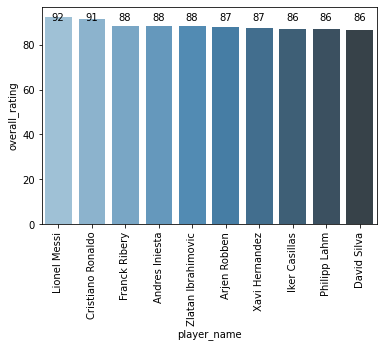

In [363]:
# ploting the top 10 chart

sb.barplot(data=data.iloc[0:10,0:10],x='player_name',y='overall_rating',palette="Blues_d")
plt.xticks(rotation=90)

# printing the text on overall_rating

rating_list = data['overall_rating'].head(10).tolist()

for i in range(0,10,1):
    x = i-0.2
    y = 91
    text = int(rating_list[i])
    plt.text(x=x,y=y,s=text)

Summary Q1 : The best professional player from top ten during 2008-2016 is Lionel Messi who got overall_rating around 92 points. 

### 2.Does the height of professional football players affected the thier capability of playing during thier career ?


In [102]:
# copy dataframe to answer question2

df_q2 = df_avg_stat.copy()

In [110]:
df_q2['year'].astype(int)
df_q2['age'] = 2016 - df_q2['year'].astype(int)
df_q2

,player_name,id,year,player_api_id,height,overall_rating,potential,crossing,finishing,short_passing,stamina,dribbling,free_kick_accuracy,age
0,Aaron Appindangoye,1,1992,505942,182.88,63.600000,67.600000,48.600000,43.600000,60.600000,54.000000,50.600000,38.600000,24
1,Aaron Cresswell,2,1989,155782,170.18,64.226190,70.416667,57.886905,49.543651,57.053571,69.166667,52.843254,52.708333,27
2,Aaron Doran,3,1991,162549,170.18,67.000000,74.192308,68.115385,57.923077,65.115385,70.923077,69.038462,55.615385,25
3,Aaron Galindo,4,1982,30572,182.88,69.825893,72.491071,57.558036,29.843750,64.700893,58.888393,55.486607,40.843750,34
4,Aaron Hughes,5,1979,23780,182.88,73.240000,74.680000,45.080000,38.840000,64.760000,66.480000,50.600000,26.360000,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11053,Zoumana Camara,11071,1979,26357,182.88,74.384615,75.461538,42.000000,27.000000,70.000000,60.000000,56.384615,35.692308,37
11054,Zsolt Laczko,11072,1986,111182,182.88,64.535714,69.642857,66.285714,45.571429,63.071429,76.892857,59.392857,62.714286,30
11055,Zsolt Low,11073,1979,36491,180.34,67.571429,72.857143,63.142857,44.571429,66.857143,70.000000,66.857143,52.571429,37
11056,Zurab Khizanishvili,11074,1981,35506,185.42,70.750000,78.125000,46.750000,43.000000,58.875000,70.500000,36.000000,41.375000,35


In [111]:
# to plot we are going to cluster the height into 4 groups which are player who height = <170,170-180,>180 cm.

# Create cluster1
df_q2_cluster1 = df_q2[(df_q2['height'] <= 170)]

# Create cluster2
df_q2_cluster2 = df_q2[(df_q2['height'] > 170) & (df_q2['height'] <= 180)]

# Create cluster3
df_q2_cluster3 = df_q2[(df_q2['height'] > 180)]

In [112]:
# Define function of each cluster by mean of skills such as crossing finishing short_passing 

def average_score(df_cluster,number):
    df_q2_cluster_final = df_cluster.groupby('year',as_index=False).mean().astype(int)
    if number == 1:
        df_q2_cluster_final["group"] = "less than 170 cm."
    elif number == 2:
        df_q2_cluster_final["group"] = "170-180 cm."
    else :
        df_q2_cluster_final["group"] = "more than 180 cm."
        
    return df_q2_cluster_final


In [113]:
# Test function and concat 3 group and concatinate 3 clusterd dataframes into one dataframe  

average_score(df_q2_cluster1,1) # Ok
average_score(df_q2_cluster2,2) # Ok
average_score(df_q2_cluster3,3) # Ok

df_q2_concat = pd.concat([average_score(df_q2_cluster1,1),average_score(df_q2_cluster2,2),average_score(df_q2_cluster3,3)])

In [114]:
# Drop unnessary coulmn which is Id becuase average id,player_id,year don't mean anythings and change year to age

df_q2_concat.drop(['id','player_api_id','year'],inplace=True,axis=1)

In [123]:
df_q2_less20 = df_q2_concat[df_q2_concat['age'] <= 20]
df_q2_less20.loc[:, 'age'] = 'less than 20 y'
df_q2_less20

C:\Users\sam\anaconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,height,overall_rating,potential,crossing,finishing,short_passing,stamina,dribbling,free_kick_accuracy,age,group
23,166,63,77,53,54,65,58,69,47,less than 20 y,less than 170 cm.
24,167,63,80,51,57,59,51,69,49,less than 20 y,less than 170 cm.
26,175,60,72,51,50,59,59,63,44,less than 20 y,170-180 cm.
27,175,59,73,50,47,57,56,62,44,less than 20 y,170-180 cm.
28,175,56,74,46,47,53,59,60,40,less than 20 y,170-180 cm.
29,185,60,73,43,44,55,57,53,37,less than 20 y,more than 180 cm.
30,184,60,74,43,42,55,58,52,37,less than 20 y,more than 180 cm.
31,186,56,73,37,33,51,53,48,34,less than 20 y,more than 180 cm.
32,190,67,84,21,28,39,51,32,20,less than 20 y,more than 180 cm.


In [124]:
df_q2_20to30 = df_q2_concat[(df_q2_concat['age'] > 20) & (df_q2_concat['age'] <= 30)]
df_q2_20to30.loc[:, 'age'] = '20 to 30 y'
df_q2_20to30

C:\Users\sam\anaconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,height,overall_rating,potential,crossing,finishing,short_passing,stamina,dribbling,free_kick_accuracy,age,group
13,166,65,68,56,52,64,65,63,58,20 to 30 y,less than 170 cm.
14,166,71,76,66,64,69,68,74,59,20 to 30 y,less than 170 cm.
15,165,65,72,60,50,66,67,67,58,20 to 30 y,less than 170 cm.
16,166,68,73,64,54,68,73,69,57,20 to 30 y,less than 170 cm.
17,166,67,74,58,58,65,68,72,55,20 to 30 y,less than 170 cm.
18,165,64,72,59,52,62,65,67,51,20 to 30 y,less than 170 cm.
19,166,64,72,55,47,63,67,65,45,20 to 30 y,less than 170 cm.
20,166,64,73,58,54,66,65,68,52,20 to 30 y,less than 170 cm.
21,165,65,75,58,56,63,60,71,50,20 to 30 y,less than 170 cm.
22,166,63,75,57,54,63,61,67,50,20 to 30 y,less than 170 cm.


In [127]:
df_q2_more30 = df_q2_concat[(df_q2_concat['age'] > 30)]
df_q2_more30.loc[:, 'age'] = 'more than 30 y'
df_q2_more30

C:\Users\sam\anaconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,height,overall_rating,potential,crossing,finishing,short_passing,stamina,dribbling,free_kick_accuracy,age,group
0,166,67,74,64,53,68,67,67,52,more than 30 y,less than 170 cm.
1,166,65,70,61,53,67,59,63,64,more than 30 y,less than 170 cm.
2,167,74,76,75,67,74,70,75,66,more than 30 y,less than 170 cm.
3,165,77,79,78,68,83,59,77,75,more than 30 y,less than 170 cm.
4,167,69,74,68,52,74,74,67,66,more than 30 y,less than 170 cm.
5,167,68,70,54,61,68,65,71,56,more than 30 y,less than 170 cm.
6,166,73,75,71,69,75,63,75,74,more than 30 y,less than 170 cm.
7,167,67,68,63,50,66,69,63,57,more than 30 y,less than 170 cm.
8,166,67,70,63,59,66,64,70,56,more than 30 y,less than 170 cm.
9,166,68,71,65,54,69,70,69,58,more than 30 y,less than 170 cm.


In [129]:
df_concat_final = pd.concat([df_q2_less20,df_q2_20to30,df_q2_more30])
df_concat_final

,height,overall_rating,potential,crossing,finishing,short_passing,stamina,dribbling,free_kick_accuracy,age,group
23,166,63,77,53,54,65,58,69,47,less than 20 y,less than 170 cm.
24,167,63,80,51,57,59,51,69,49,less than 20 y,less than 170 cm.
26,175,60,72,51,50,59,59,63,44,less than 20 y,170-180 cm.
27,175,59,73,50,47,57,56,62,44,less than 20 y,170-180 cm.
28,175,56,74,46,47,53,59,60,40,less than 20 y,170-180 cm.
...,...,...,...,...,...,...,...,...,...,...,...
14,185,69,71,51,46,59,64,52,47,more than 30 y,more than 180 cm.
15,185,68,70,48,44,57,64,50,45,more than 30 y,more than 180 cm.
16,185,68,71,50,47,58,65,51,46,more than 30 y,more than 180 cm.
17,185,68,71,50,47,58,66,53,46,more than 30 y,more than 180 cm.


C:\Users\sam\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Average overall rate chart during 2008-2016 by cluster age and height')

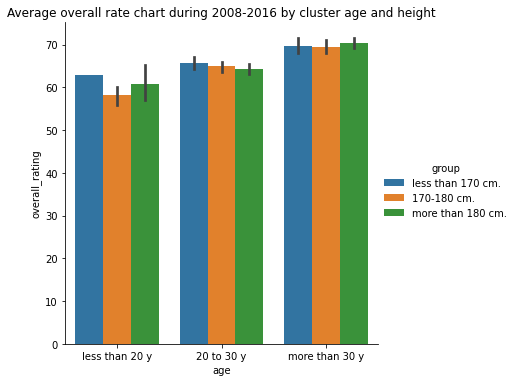

In [132]:
sb.factorplot(x='age', y='overall_rating', hue='group', data=df_concat_final, kind='bar')
plt.title('Average overall rate chart during 2008-2016 by cluster age and height')

Summary Q2 : We shall see that the more year goes,the more player rating. It is because the rising players who is less than 20 year have less experience than other groups. Moreover, you shall see that in the first group (less than 20 y) and inthe second group (20 to 30 y) shows that the players who have height less than 170 cm. get higher score than player who have height more than 170 cm.However, in the last group which is more than 30 y, player who have height less than 170 cm. get slightly less socre than others. Therefore, the as fact shown,the height is not that important becuase the overall rating calculated not only the defensive but also dribbing,crossing,etc and it might be important if we calculate only the defensive score.